# Rainfall Weather Forecasting
### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

####  Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.      
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:
Number of columns: 23


Date  - The date of observation                                                                                     
Location  - The common name of the location of the weather station                                              
MinTemp  - The minimum temperature in degrees celsius                                                            
MaxTemp - The maximum temperature in degrees celsius                                                         
Rainfall  - The amount of rainfall recorded for the day in mm                                                                   
Evaporation  - The so-called Class A pan evaporation (mm) in the 24 hours to 9am                                        
Sunshine  - The number of hours of bright sunshine in the day.                                               
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight                                    
WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                     
WindDir9am - Direction of the wind at 9am                                                                            
WindDir3pm - Direction of the wind at 3pm                                                                              
WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am                                                    
WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm                                                         
Humidity9am - Humidity (percent) at 9am                                                                                      
Humidity3pm - Humidity (percent) at 3pm                                                                                         
Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am                                            
Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm                                                       
Cloud9am - Fraction of sky obscured by cloud at 9am.                                                                        
Cloud3pm - Fraction of sky obscured by cloud                                                                           
Temp9am - Temperature (degrees C) at 9am                                                                              
Temp3pm - Temperature (degrees C) at 3pm                                                                                 
RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                                  
RainTomorrow - The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk". 


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Exploratory Data Analysis (EDA)

In [3]:
# checking shape
print(df.shape)
print('Rows =',df.shape[0],'\nColumns =',df.shape[1])

(8425, 23)
Rows = 8425 
Columns = 23


In [4]:
# columns data type
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
# adding month column
df['Month']= pd.to_datetime(df['Date']).dt.month

In [6]:
# checking duplicate data
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 1663
1663 duplicate rows present in the dataset.


In [7]:
# checking duplicate rows
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
3674,2015-10-20,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,...,37.0,1021.4,1016.4,1.0,1.0,21.5,30.3,No,No,10
3675,2015-10-21,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,...,39.0,1014.7,1010.6,1.0,5.0,24.7,30.2,No,Yes,10
3676,2015-10-22,Williamtown,17.5,26.3,19.8,7.8,NaN,SW,67.0,NaN,...,45.0,1012.4,1008.3,8.0,6.0,18.6,25.6,Yes,NaN,10
3677,2015-10-23,Williamtown,14.7,21.4,NaN,NaN,NaN,S,59.0,WSW,...,48.0,1021.4,1020.9,7.0,5.0,15.6,20.3,NaN,NaN,10
3678,2015-10-24,Williamtown,11.0,22.5,NaN,NaN,NaN,E,35.0,NW,...,60.0,1024.5,1021.4,NaN,NaN,18.4,21.4,NaN,Yes,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,...,60.0,1015.2,1014.0,8.0,2.0,20.8,23.8,No,No,1
6144,2012-01-26,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,...,55.0,1018.5,1016.9,NaN,NaN,18.9,23.7,No,NaN,1
6145,2012-01-27,Melbourne,16.6,30.7,NaN,8.0,13.0,SSE,39.0,WSW,...,55.0,1016.9,1013.5,NaN,NaN,20.5,26.3,NaN,NaN,1
6146,2012-01-28,Melbourne,20.0,30.4,NaN,8.2,12.1,SSE,37.0,SW,...,55.0,1012.7,1009.2,NaN,NaN,24.1,27.4,NaN,NaN,1


In [8]:
# removing duplicate rows
df = df.drop_duplicates()

In [9]:
# lets confirm duplicate rows have removed
df.duplicated().sum()

0

In [10]:
# reset the indices
df.reset_index(inplace=True,drop=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
6758,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
6759,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
6760,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


In [11]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Month               0
dtype: int64

Total null values in dataset -  16513


Lots of null values present in the dataset. Target variables also contain null values.

In [12]:
# Null count and percentage in columns
nan = pd.DataFrame()

nan['Columns'] = df.columns
nan['NaN'] = [df[i].isnull().sum() for i in df.columns]
nan['NaN percentage'] = [((df[i].isnull().sum()/df.shape[0])*100).round(2) for i in df.columns]
nan

,Columns,NaN,NaN percentage
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,70,1.04
3,MaxTemp,57,0.84
4,Rainfall,138,2.04
5,Evaporation,2921,43.20
6,Sunshine,3236,47.86
7,WindGustDir,942,13.93
8,WindGustSpeed,942,13.93
9,WindDir9am,794,11.74


In [13]:
# checking null values of target variables
df[df['Rainfall'].isnull() | df['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN,12
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,12
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN,9
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,...,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No,9
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,2014-12-06,Adelaide,16.4,23.7,NaN,NaN,NaN,S,43.0,S,...,50.0,1012.1,1010.6,NaN,NaN,18.8,21.6,NaN,NaN,12
5247,2014-12-07,Adelaide,15.8,25.3,NaN,NaN,NaN,WSW,37.0,S,...,51.0,1008.8,1007.0,NaN,NaN,19.1,24.2,NaN,No,12
5252,2014-12-12,Adelaide,13.9,31.1,0.0,7.2,NaN,ESE,39.0,E,...,36.0,1018.8,1015.6,NaN,NaN,21.6,29.3,No,NaN,12
5253,2014-12-13,Adelaide,16.7,35.9,NaN,NaN,NaN,WSW,43.0,NNE,...,13.0,1012.3,1009.1,NaN,NaN,29.1,34.6,NaN,No,12


If we remove null values of target variables we will lose 204 rows (3%) of data.

In [14]:
# unique values and value counts 
for i in df.columns:
    print('\nTotal unique values in column',i,'-',df[i].nunique())
    print('\nunique values in column',i,'-')
    print(df[i].value_counts())
    print('_'*50)


Total unique values in column Date - 3004

unique values in column Date -
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
__________________________________________________

Total unique values in column Location - 12

unique values in column Location -
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
__________________________________________________

Total unique values in column MinTemp - 285

unique values in column MinTemp -
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
____

Columns Cloud9am and Cloud3pm contain categirical variables. 

In [15]:
# dropping irrevelant column
df.drop('Date',axis=1,inplace=True)

In [16]:
# dropping null values of target variables
df.dropna(subset=['Rainfall','RainTomorrow'],axis=0,inplace=True)

In [17]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 6760
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6558 non-null   object 
 1   MinTemp        6511 non-null   float64
 2   MaxTemp        6524 non-null   float64
 3   Rainfall       6558 non-null   float64
 4   Evaporation    3729 non-null   float64
 5   Sunshine       3425 non-null   float64
 6   WindGustDir    5656 non-null   object 
 7   WindGustSpeed  5656 non-null   float64
 8   WindDir9am     5791 non-null   object 
 9   WindDir3pm     6285 non-null   object 
 10  WindSpeed9am   6517 non-null   float64
 11  WindSpeed3pm   6478 non-null   float64
 12  Humidity9am    6523 non-null   float64
 13  Humidity3pm    6481 non-null   float64
 14  Pressure9am    5274 non-null   float64
 15  Pressure3pm    5273 non-null   float64
 16  Cloud9am       4819 non-null   float64
 17  Cloud3pm       4778 non-null   float64
 18  Temp9am 

Now we have 6558 rows and 22 columns. some columns contain null values.

In [18]:
# statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6511.0,13.069329,5.587838,-2.0,8.95,13.1,17.5,28.5
MaxTemp,6524.0,24.094651,6.144168,8.2,19.50,23.4,28.4,45.5
Rainfall,6558.0,2.771134,10.599379,0.0,0.00,0.0,0.8,371.0
Evaporation,3729.0,5.328265,4.468143,0.0,2.80,4.6,7.0,145.0
Sunshine,3425.0,7.948993,3.763341,0.0,5.50,9.0,10.8,13.9
WindGustSpeed,5656.0,38.818246,14.376331,7.0,28.00,37.0,48.0,107.0
WindSpeed9am,6517.0,12.699402,9.813220,0.0,6.00,11.0,19.0,61.0
WindSpeed3pm,6478.0,17.483637,9.611889,0.0,9.00,17.0,24.0,83.0
Humidity9am,6523.0,67.458991,17.271156,10.0,55.00,68.0,80.0,100.0
Humidity3pm,6481.0,50.430952,18.644909,6.0,37.00,50.0,63.0,99.0


In [19]:
df.describe(include='object').T

,count,unique,top,freq
Location,6558,12,PerthAirport,1204
WindGustDir,5656,16,E,513
WindDir9am,5791,16,N,580
WindDir3pm,6285,16,SE,665
RainToday,6558,2,No,5005
RainTomorrow,6558,2,No,5023


In [20]:
# numerical columns and categorical columns
num_col = []
cat_col = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('Numerical columns-\n',num_col,'\n\nCategorical columns-\n',cat_col)


Numerical columns-
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month'] 

Categorical columns-
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### Data visualization

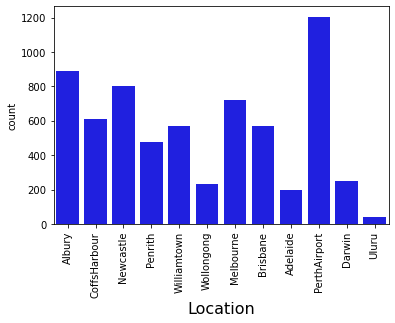

In [21]:
sns.countplot('Location',color='b',data=df)
plt.xticks(rotation=90)
plt.xlabel('Location',fontsize=16)
plt.show()

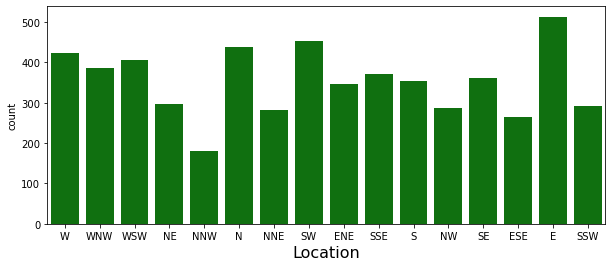

In [22]:
plt.figure(figsize=(10,4))
sns.countplot('WindGustDir',color='g',data=df)
plt.xlabel('Location',fontsize=16)
plt.show()

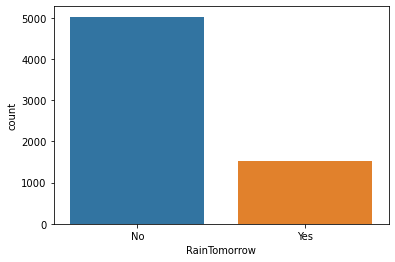

In [23]:
sns.countplot('RainTomorrow',data=df)
plt.show()

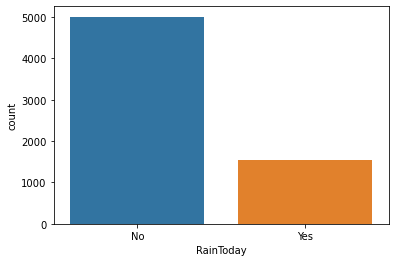

In [24]:
sns.countplot('RainToday',data=df)
plt.show()

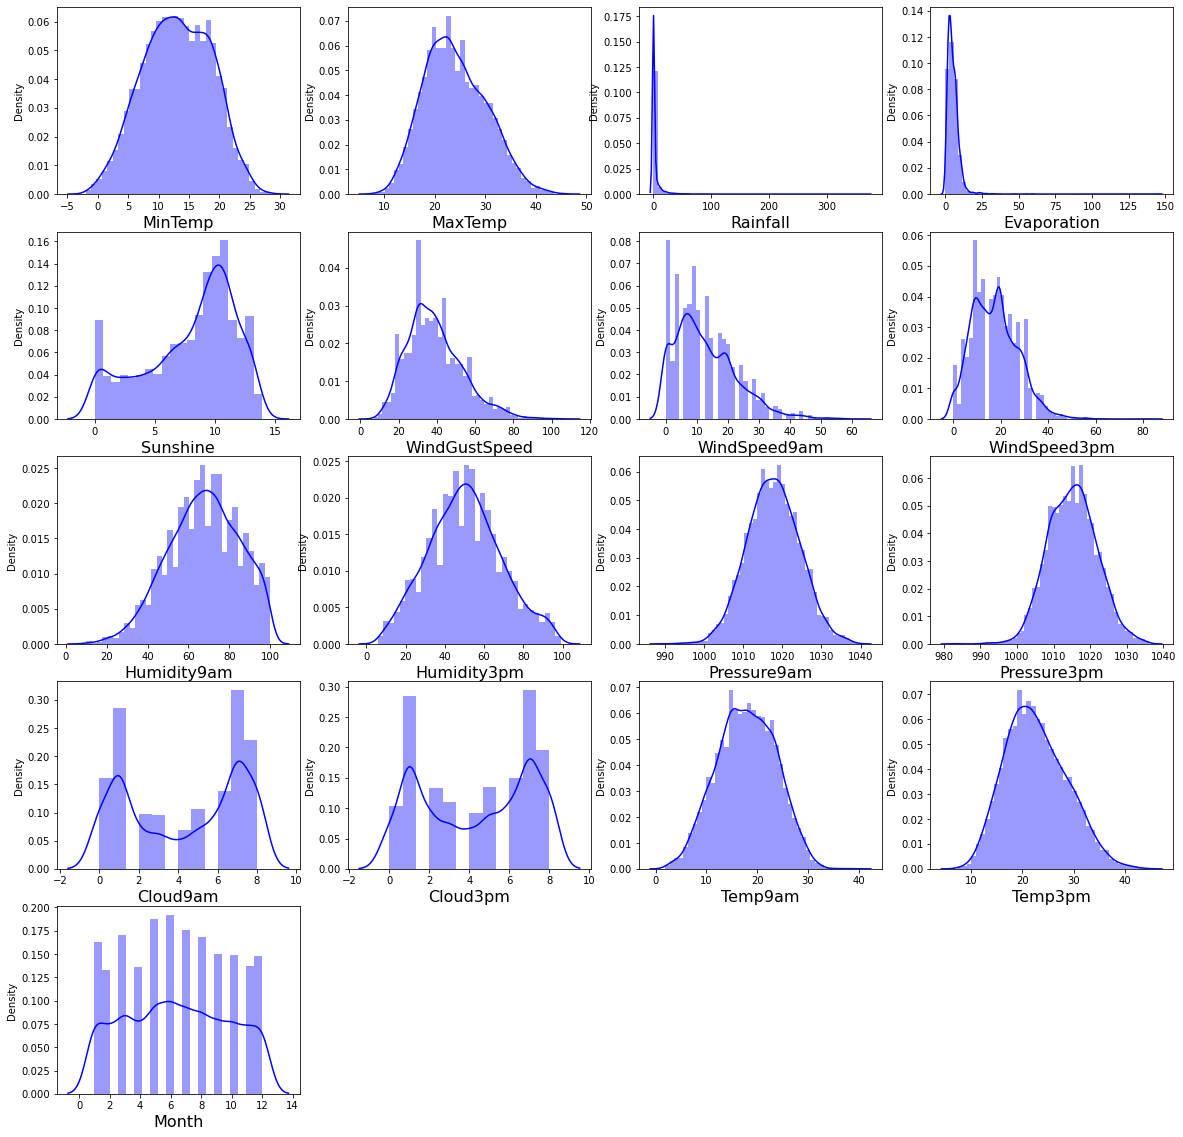

In [25]:
# distribution plot
plt.figure(figsize=(20,20))
pn=1

for i in num_col:
    if pn<20:
        ax = plt.subplot(5,4,pn)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

In [26]:
# features and target variables
def plot(x,y,hue,R):
    plt.figure(figsize=(20,6))

    ax1 = plt.subplot(1,2,1)
    sns.countplot(x,hue=hue,data=df)
    plt.xticks(rotation=R)
    plt.xlabel(x,fontsize=16)
    
    ax2 = plt.subplot(1,2,2)
    sns.scatterplot(x,y,data=df)
    plt.xticks(rotation=R)
    plt.yticks(rotation=R)
    plt.xlabel(x,fontsize=16)
    plt.ylabel(y,fontsize=20)
    plt.show()

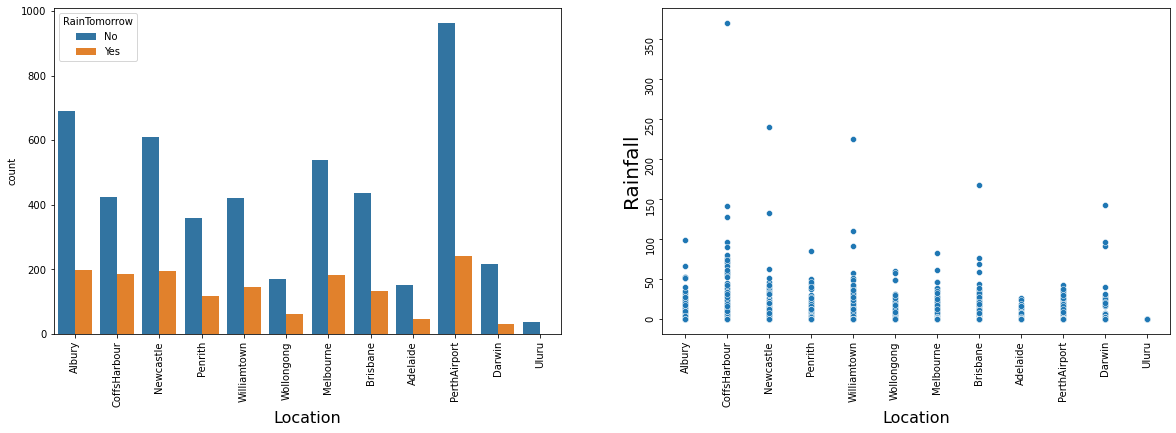

In [27]:
plot('Location','Rainfall','RainTomorrow',90)

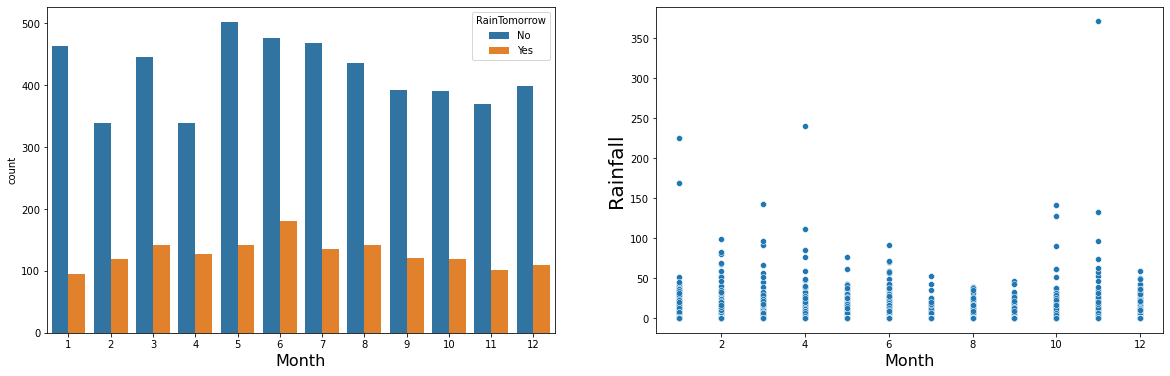

In [28]:
plot('Month','Rainfall','RainTomorrow',None)

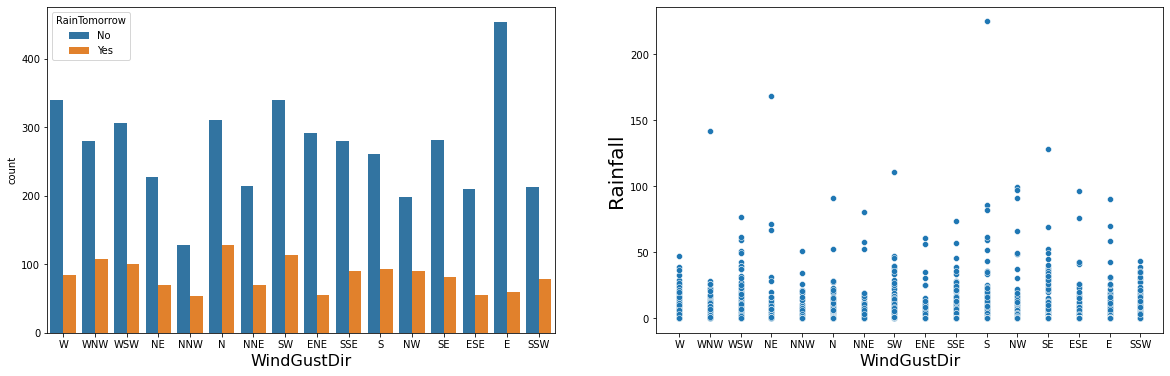

In [29]:
plot('WindGustDir','Rainfall','RainTomorrow',None)

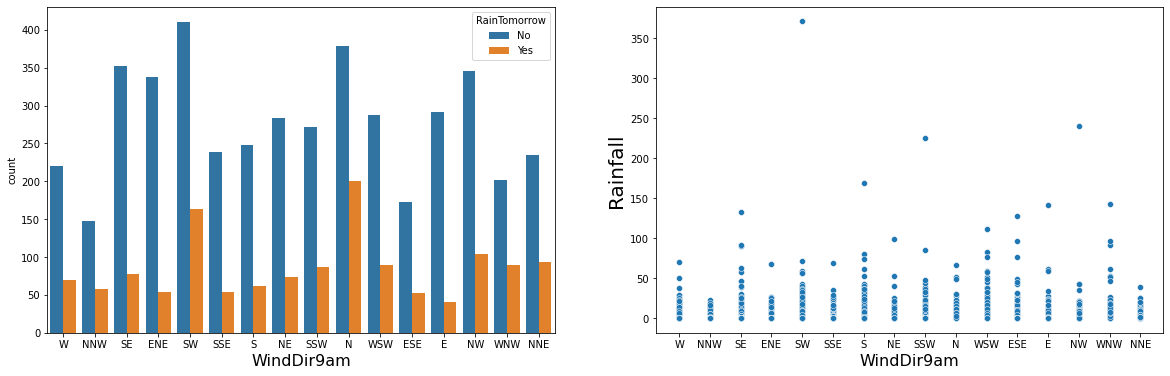

In [30]:
plot('WindDir9am','Rainfall','RainTomorrow',None)

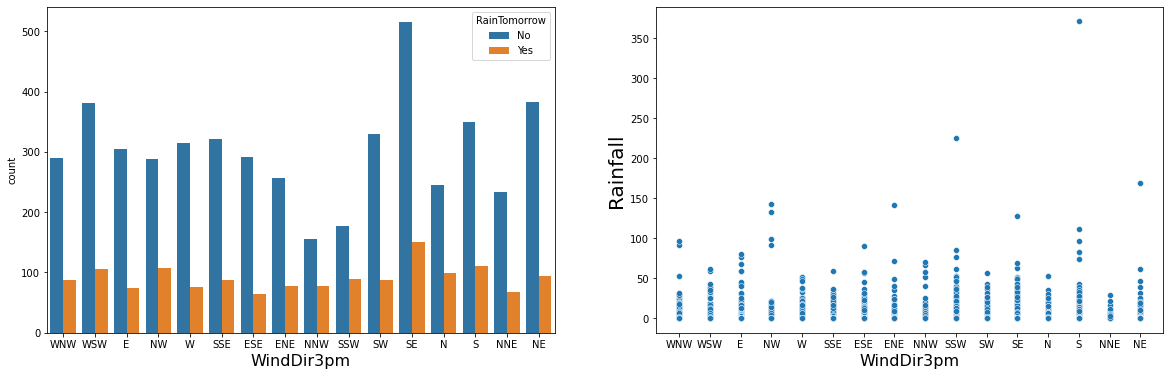

In [31]:
plot('WindDir3pm','Rainfall','RainTomorrow',None)

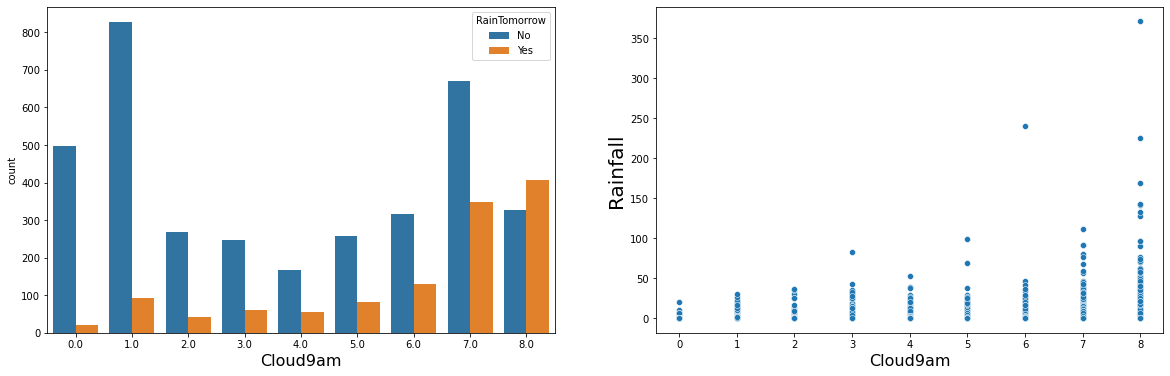

In [32]:
plot('Cloud9am','Rainfall','RainTomorrow',None)

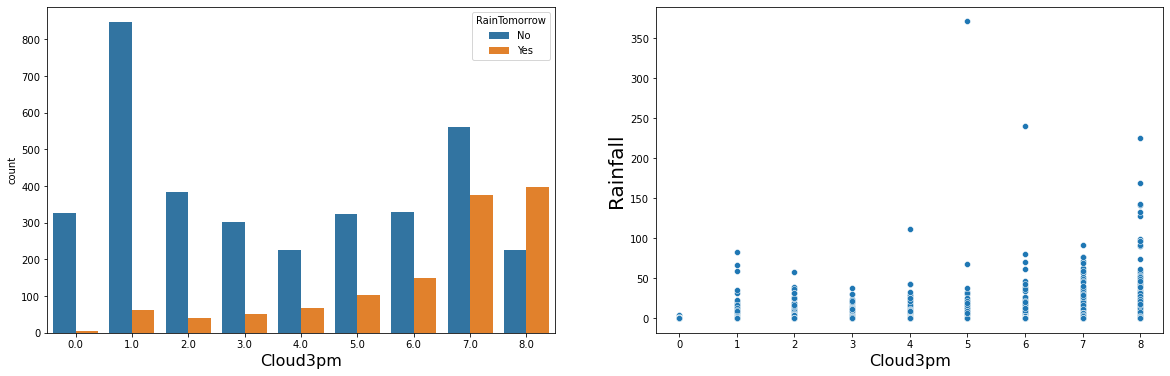

In [33]:
plot('Cloud3pm','Rainfall','RainTomorrow',None)

In [34]:
# scatterplot feature vs feature
def plot2(x1,y1,x2,y2,hue,R):
    plt.figure(figsize=(20,5))

    ax1 = plt.subplot(1,2,1)
    sns.scatterplot(x1,y1,hue=hue,data=df)
    plt.xticks(rotation=R)
    plt.yticks(rotation=R)
    plt.xlabel(x1,fontsize=16)
    plt.ylabel(y1,fontsize=16)
    
    ax2 = plt.subplot(1,2,2)
    sns.scatterplot(x2,y2,hue=hue,data=df)
    plt.xticks(rotation=R)
    plt.yticks(rotation=R)
    plt.xlabel(x2,fontsize=16)
    plt.ylabel(y2,fontsize=16)
    plt.show()

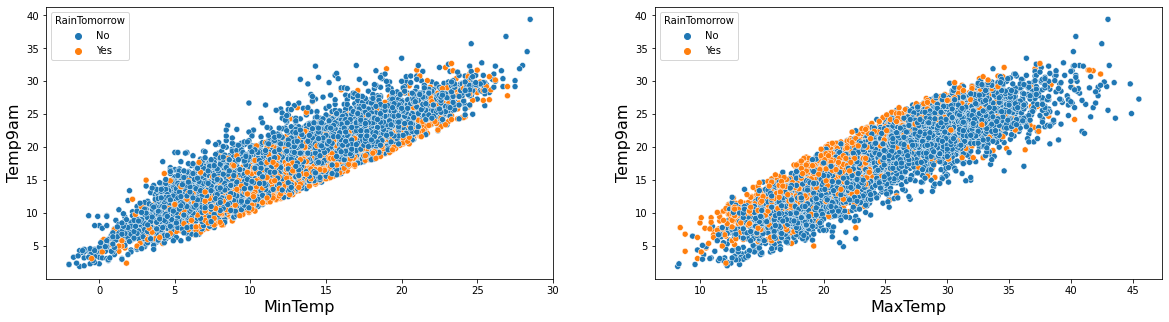

In [35]:
plot2('MinTemp','Temp9am','MaxTemp','Temp9am','RainTomorrow',None)

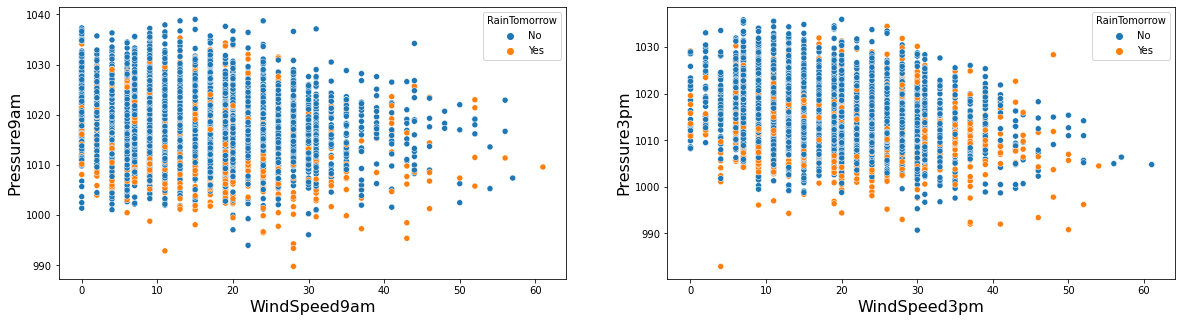

In [36]:
plot2('WindSpeed9am','Pressure9am','WindSpeed3pm','Pressure3pm','RainTomorrow',None)

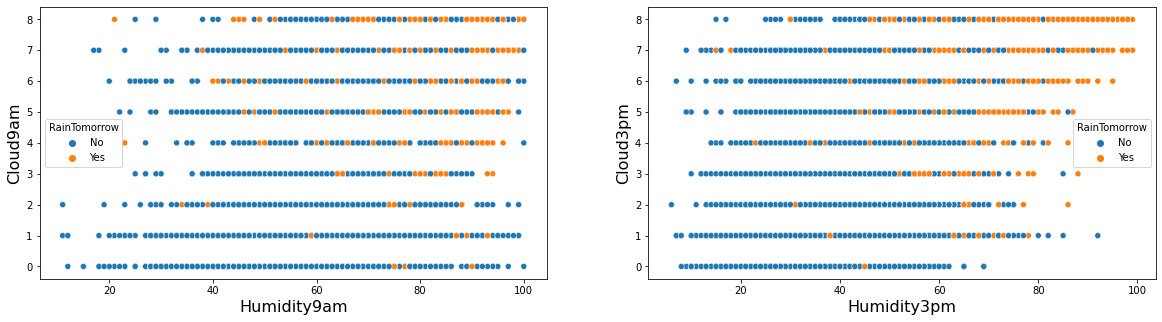

In [37]:
plot2('Humidity9am','Cloud9am','Humidity3pm','Cloud3pm','RainTomorrow',None)

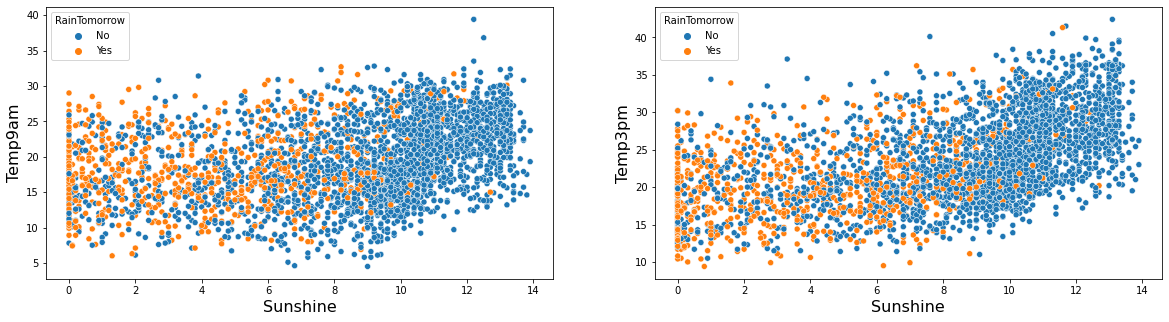

In [38]:
plot2('Sunshine','Temp9am','Sunshine','Temp3pm','RainTomorrow',None)

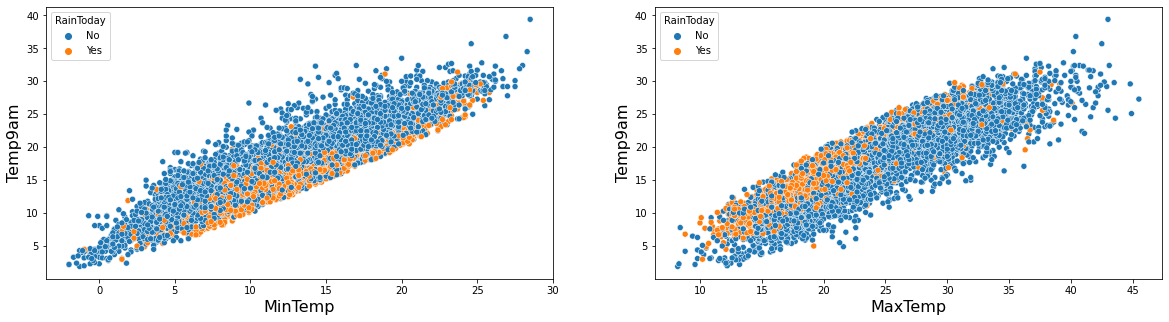

In [39]:
plot2('MinTemp','Temp9am','MaxTemp','Temp9am','RainToday',None)

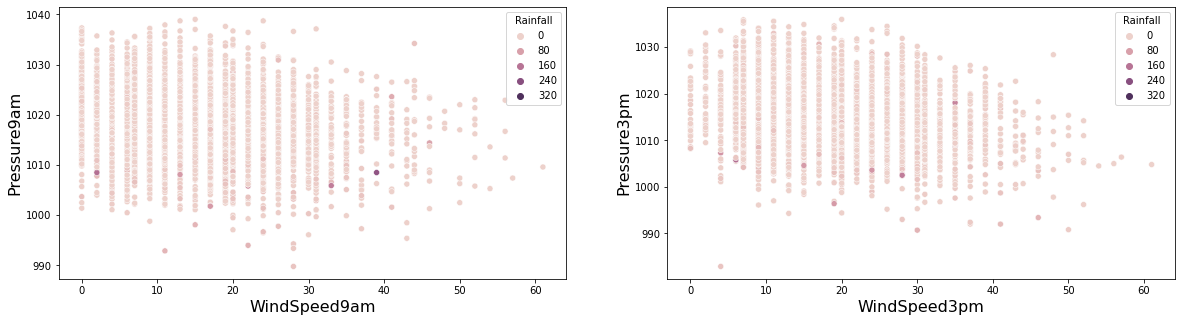

In [40]:
plot2('WindSpeed9am','Pressure9am','WindSpeed3pm','Pressure3pm','Rainfall',None)

In [41]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
MinTemp,1.000000,0.732444,0.096518,0.370205,0.051218,0.255629,0.171646,0.192475,-0.156437,0.070187,-0.484942,-0.483743,0.113514,0.058383,0.893637,0.701529,-0.250759
MaxTemp,0.732444,1.000000,-0.088533,0.470093,0.507077,0.173251,0.059333,0.120147,-0.428148,-0.432402,-0.364595,-0.445087,-0.298854,-0.293049,0.869940,0.979701,-0.183530
Rainfall,0.096518,-0.088533,1.000000,-0.000975,-0.234464,0.114130,0.051523,0.023846,0.229727,0.244894,-0.081526,-0.037872,0.205432,0.170434,-0.004626,-0.092736,-0.011927
Evaporation,0.370205,0.470093,-0.000975,1.000000,0.376530,0.251095,0.220136,0.166928,-0.333381,-0.261278,-0.246152,-0.264096,-0.099249,-0.170176,0.433674,0.458831,-0.011778
Sunshine,0.051218,0.507077,-0.234464,0.376530,1.000000,0.015772,0.020555,0.075275,-0.541027,-0.634705,-0.005686,-0.078277,-0.705752,-0.724906,0.338699,0.532108,-0.001960
WindGustSpeed,0.255629,0.173251,0.114130,0.251095,0.015772,1.000000,0.656110,0.711766,-0.292864,-0.102090,-0.416201,-0.384365,0.013394,0.076893,0.233146,0.135520,0.044821
WindSpeed9am,0.171646,0.059333,0.051523,0.220136,0.020555,0.656110,1.000000,0.558969,-0.378121,-0.124834,-0.201059,-0.168629,-0.032184,0.022822,0.154488,0.044492,0.024456
WindSpeed3pm,0.192475,0.120147,0.023846,0.166928,0.075275,0.711766,0.558969,1.000000,-0.267708,-0.101744,-0.295594,-0.249810,-0.017389,-0.022804,0.213672,0.096180,0.053455
Humidity9am,-0.156437,-0.428148,0.229727,-0.333381,-0.541027,-0.292864,-0.378121,-0.267708,1.000000,0.641577,0.155901,0.197050,0.488333,0.378429,-0.408518,-0.420252,-0.098044
Humidity3pm,0.070187,-0.432402,0.244894,-0.261278,-0.634705,-0.102090,-0.124834,-0.101744,0.641577,1.000000,-0.008741,0.065646,0.517230,0.541034,-0.134813,-0.499866,-0.052546


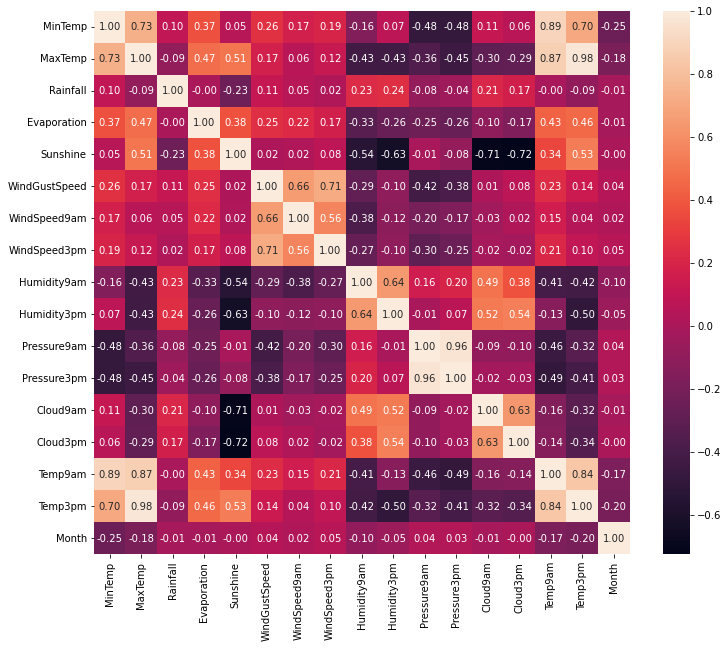

In [42]:
# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

1) MinTemp and MaxTemp have positive correlation.                                                           
2) Sunshine is negatively correlated with Cloud9am,Cloud3pm,Humidity9am and Humidity3pm.               
3) Temp9am and Temp3pm have strong positive correlation.                                                      
4) Humidity9am nad Humidity3pm have positive correlation.                                           
5) Pressure9am and Pressure3pm have strong positive correlation.
6) Cloud9am and Cloud3pm have positive correlation.                                                     
7) WindSpeed, WindSpeed9am and WindSpeed3pm are positively correlated.

In [43]:
# seperating features and target variables
x=df.drop(columns=['Rainfall','RainTomorrow'])
y1 = df['Rainfall']
y2 = df['RainTomorrow']

In [44]:
# checking features skewness
x.skew()

MinTemp          -0.070391
MaxTemp           0.332770
Evaporation      10.284797
Sunshine         -0.657966
WindGustSpeed     0.722370
WindSpeed9am      0.941002
WindSpeed3pm      0.553622
Humidity9am      -0.250305
Humidity3pm       0.150881
Pressure9am       0.019526
Pressure3pm       0.042635
Cloud9am         -0.166369
Cloud3pm         -0.128016
Temp9am          -0.045312
Temp3pm           0.349645
Month             0.026796
dtype: float64

In [45]:
# skew columns
skew_col=[]

for i in x.columns:
    if x[i].dtypes !='object':
        if x[i].skew() > 0.5 or x[i].skew() < -0.5:
            skew_col.append(i)
        else:
            pass
skew_col

['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

In [46]:
# reducing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
x[skew_col] = pt.fit_transform(x[skew_col])
x.skew()

MinTemp         -0.070391
MaxTemp          0.332770
Evaporation      0.002313
Sunshine        -0.415727
WindGustSpeed   -0.003553
WindSpeed9am    -0.103805
WindSpeed3pm    -0.043203
Humidity9am     -0.250305
Humidity3pm      0.150881
Pressure9am      0.019526
Pressure3pm      0.042635
Cloud9am        -0.166369
Cloud3pm        -0.128016
Temp9am         -0.045312
Temp3pm          0.349645
Month            0.026796
dtype: float64

skewness is reduced.

In [47]:
# replacing NaN values
col1 =['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
       'Pressure9am','Pressure3pm','Temp9am','Temp3pm']
col2=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','Cloud9am', 'Cloud3pm']

for i in col1:
    x[i] = df[i].replace(np.nan,df[i].mean()).round(2)
for j in col2:
    x[j] = df[j].replace(np.nan,df[j].mode()[0])

In [48]:
# checking null values
x.isnull().sum().sum()

0

In [49]:
# list of columns for scaling
col= ['MinTemp','MaxTemp','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm',
           'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

In [50]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()
x[col] = SD.fit_transform(x[col])
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,Albury,0.059394,-0.194953,0.000293,0.000193,W,0.388131,W,WNW,0.746349,...,0.205589,-1.534013,-1.659068,-1.354637,8.0,7.0,-0.172806,-0.152388,No,12
1,Albury,-1.018318,0.164069,0.000293,0.000193,WNW,0.388131,NNW,WSW,-0.889351,...,-1.362020,-1.372146,-1.177298,-1.237045,7.0,7.0,-0.120443,0.266524,No,12
2,Albury,-0.030415,0.261984,0.000293,0.000193,WSW,0.537944,W,WSW,0.644118,...,-1.710377,-1.102367,-1.675681,-1.085855,7.0,2.0,0.542827,0.082203,No,12
3,Albury,-0.695004,0.637326,0.000293,0.000193,NE,-1.110006,SE,E,-0.173732,...,-1.303960,-1.857748,-0.014405,-0.397103,7.0,7.0,0.036647,0.635166,No,12
4,Albury,0.795830,1.339052,0.000293,0.000193,W,0.163410,ENE,NW,-0.582657,...,0.844245,-0.940500,-1.144073,-1.539424,7.0,8.0,-0.015716,1.171374,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6756,Uluru,-1.718831,-0.374465,0.000293,0.000193,E,-0.585658,ESE,E,0.235193,...,-0.491126,-1.264235,1.165100,1.013998,7.0,7.0,-1.481891,-0.303196,No,6
6757,Uluru,-1.844564,-0.113357,0.000293,0.000193,E,-0.585658,SE,ENE,0.030730,...,-0.955602,-1.426102,1.148488,0.862809,7.0,7.0,-1.359710,-0.051849,No,6
6758,Uluru,-1.700869,0.196707,0.000293,0.000193,NNW,-1.259819,SE,N,0.030730,...,-0.665305,-1.587969,0.965747,0.661223,7.0,7.0,-1.220074,0.300037,No,6
6759,Uluru,-1.377555,0.457815,0.000293,0.000193,N,-0.136217,SE,WNW,-0.378195,...,-0.839483,-1.426102,0.550428,0.274850,7.0,7.0,-0.940803,0.568140,No,6


In [51]:
# encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
x[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','Month']] = OE.fit_transform(x[['Location','WindGustDir',
                                                                                'WindDir9am','WindDir3pm','RainToday','Month']])
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,1.0,0.059394,-0.194953,0.000293,0.000193,13.0,0.388131,13.0,14.0,0.746349,...,0.205589,-1.534013,-1.659068,-1.354637,8.0,7.0,-0.172806,-0.152388,0.0,11.0
1,1.0,-1.018318,0.164069,0.000293,0.000193,14.0,0.388131,6.0,15.0,-0.889351,...,-1.362020,-1.372146,-1.177298,-1.237045,7.0,7.0,-0.120443,0.266524,0.0,11.0
2,1.0,-0.030415,0.261984,0.000293,0.000193,15.0,0.537944,13.0,15.0,0.644118,...,-1.710377,-1.102367,-1.675681,-1.085855,7.0,2.0,0.542827,0.082203,0.0,11.0
3,1.0,-0.695004,0.637326,0.000293,0.000193,4.0,-1.110006,9.0,0.0,-0.173732,...,-1.303960,-1.857748,-0.014405,-0.397103,7.0,7.0,0.036647,0.635166,0.0,11.0
4,1.0,0.795830,1.339052,0.000293,0.000193,13.0,0.163410,1.0,7.0,-0.582657,...,0.844245,-0.940500,-1.144073,-1.539424,7.0,8.0,-0.015716,1.171374,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6756,9.0,-1.718831,-0.374465,0.000293,0.000193,0.0,-0.585658,2.0,0.0,0.235193,...,-0.491126,-1.264235,1.165100,1.013998,7.0,7.0,-1.481891,-0.303196,0.0,5.0
6757,9.0,-1.844564,-0.113357,0.000293,0.000193,0.0,-0.585658,9.0,1.0,0.030730,...,-0.955602,-1.426102,1.148488,0.862809,7.0,7.0,-1.359710,-0.051849,0.0,5.0
6758,9.0,-1.700869,0.196707,0.000293,0.000193,6.0,-1.259819,9.0,3.0,0.030730,...,-0.665305,-1.587969,0.965747,0.661223,7.0,7.0,-1.220074,0.300037,0.0,5.0
6759,9.0,-1.377555,0.457815,0.000293,0.000193,3.0,-0.136217,9.0,14.0,-0.378195,...,-0.839483,-1.426102,0.550428,0.274850,7.0,7.0,-0.940803,0.568140,0.0,5.0


### Models

#### First model

In [52]:
# checking y1
y1.value_counts()

0.0      4292
0.2       320
0.4       144
0.6        85
1.2        68
         ... 
141.8       1
49.6        1
30.0        1
37.6        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [53]:
# replacing values
# replacing rainfall amount taking reference from a news article
for i in y1.unique():
    if i == 0:
        y1 = y1.replace(i,'No rain')
        
    elif 0<=i<15:
        y1 = y1.replace(i,'Light rain')
        
    elif 15<=i<64.5:
        y1 = y1.replace(i,'Moderate rain')
        
    elif 64.5<= i<115.5:
        y1 = y1.replace(i,'Heavy rain')
        
    elif 115.5<=i:
        y1 = y1.replace(i,'Very heavy rain')

In [54]:
y1.value_counts()

No rain            4292
Light rain         1936
Moderate rain       304
Heavy rain           18
Very heavy rain       8
Name: Rainfall, dtype: int64

In [55]:
x1=x.copy()

# balancing data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x1,y1)
print(x1.shape)
print(y1.shape)

(21460, 21)
(21460,)


In [56]:
y1.value_counts()

Light rain         4292
No rain            4292
Moderate rain      4292
Heavy rain         4292
Very heavy rain    4292
Name: Rainfall, dtype: int64

In [57]:
# encoding target variable y1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y1.values.reshape(-1,1))

In [58]:
y1

array([1, 3, 3, ..., 4, 4, 4])

In [59]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [60]:
# creating lists of models
LR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [61]:
# train-test split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30, random_state=117)

In [62]:
# LogisticRegression model 
LR.fit(x1_train,y1_train)
y1_pred=LR.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LR,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7303510406958683 

confusion matrix:-
 [[1020    0  165    0  147]
 [  90  538  296  289   78]
 [ 188  211  696    0  156]
 [   2   77    0 1236   13]
 [  24    0    0    0 1212]] 

classification report:-
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1332
           1       0.65      0.42      0.51      1291
           2       0.60      0.56      0.58      1251
           3       0.81      0.93      0.87      1328
           4       0.75      0.98      0.85      1236

    accuracy                           0.73      6438
   macro avg       0.72      0.73      0.71      6438
weighted avg       0.72      0.73      0.72      6438

checking Cross validation score:-

cross validation scores:- [0.6556384  0.66542404 0.69151911 0.68918919 0.69384902 0.68732526
 0.74976701 0.74743709 0.74836906 0.74464119] 
cross validation mean score = 0.7073159366262814 
Difference between accuracy score and cross validation mean 

In [63]:
# RandomForestClassifier model
RFC.fit(x1_train,y1_train)
y1_pred=RFC.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9516930723827276 

confusion matrix:-
 [[1332    0    0    0    0]
 [   0 1033   78  178    2]
 [   1   11 1238    0    1]
 [   0   40    0 1288    0]
 [   0    0    0    0 1236]] 

classification report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1332
           1       0.95      0.80      0.87      1291
           2       0.94      0.99      0.96      1251
           3       0.88      0.97      0.92      1328
           4       1.00      1.00      1.00      1236

    accuracy                           0.95      6438
   macro avg       0.95      0.95      0.95      6438
weighted avg       0.95      0.95      0.95      6438

checking Cross validation score:-

cross validation scores:- [0.92264678 0.89468779 0.87744641 0.81220876 0.82665424 0.94082013
 0.93150047 0.95013979 0.97204101 0.95992544] 
cross validation mean score = 0.9088070829450141 
Difference between accuracy score and cross validation mean 

In [64]:
# GradientBoostingClassifier model
GBC.fit(x1_train,y1_train)
y1_pred=GBC.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(GBC,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8925132028580305 

confusion matrix:-
 [[1331    1    0    0    0]
 [  13  753  280  240    5]
 [  10   92 1140    0    9]
 [   0   42    0 1286    0]
 [   0    0    0    0 1236]] 

classification report:-
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1332
           1       0.85      0.58      0.69      1291
           2       0.80      0.91      0.85      1251
           3       0.84      0.97      0.90      1328
           4       0.99      1.00      0.99      1236

    accuracy                           0.89      6438
   macro avg       0.89      0.89      0.89      6438
weighted avg       0.89      0.89      0.89      6438

checking Cross validation score:-

cross validation scores:- [0.8359739  0.83038211 0.82059646 0.75722274 0.70922647 0.88583411
 0.86999068 0.86719478 0.9137931  0.90354147] 
cross validation mean score = 0.8393755824790308 
Difference between accuracy score and cross validation mean 

In [65]:
# ExtraTreesclassifier model
ETC.fit(x1_train,y1_train)
y1_pred=ETC.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9602360981671326 

confusion matrix:-
 [[1332    0    0    0    0]
 [   0 1076   59  156    0]
 [   0    7 1244    0    0]
 [   0   34    0 1294    0]
 [   0    0    0    0 1236]] 

classification report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1332
           1       0.96      0.83      0.89      1291
           2       0.95      0.99      0.97      1251
           3       0.89      0.97      0.93      1328
           4       1.00      1.00      1.00      1236

    accuracy                           0.96      6438
   macro avg       0.96      0.96      0.96      6438
weighted avg       0.96      0.96      0.96      6438

checking Cross validation score:-

cross validation scores:- [0.93802423 0.91565704 0.88024231 0.83923579 0.87837838 0.95107176
 0.9473439  0.97856477 0.97763281 0.97763281] 
cross validation mean score = 0.9283783783783782 
Difference between accuracy score and cross validation mean 

In [66]:
# KNeighborsClassifier model
KNN.fit(x1_train,y1_train)
y1_pred=KNN.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(KNN,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8664181422802113 

confusion matrix:-
 [[1332    0    0    0    0]
 [  23  967  157  139    5]
 [   1    4 1245    1    0]
 [  13  406  105  798    6]
 [   0    0    0    0 1236]] 

classification report:-
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1332
           1       0.70      0.75      0.72      1291
           2       0.83      1.00      0.90      1251
           3       0.85      0.60      0.70      1328
           4       0.99      1.00      1.00      1236

    accuracy                           0.87      6438
   macro avg       0.87      0.87      0.86      6438
weighted avg       0.87      0.87      0.86      6438

checking Cross validation score:-

cross validation scores:- [0.83970177 0.83457596 0.78238583 0.76514445 0.79356943 0.8359739
 0.83504194 0.89794967 0.90214352 0.89934762] 
cross validation mean score = 0.8385834109972041 
Difference between accuracy score and cross validation mean s

In [67]:
# AdaBoostClassifier model
ABC.fit(x1_train,y1_train)
y1_pred=ABC.predict(x1_test)
acc_score = accuracy_score(y1_test,y1_pred)
CM = confusion_matrix(y1_test,y1_pred)
CR = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ABC,x1,y1,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.6677539608574091 

confusion matrix:-
 [[ 918   49  232    0  133]
 [  45  729  304  205    8]
 [ 144  288  767    0   52]
 [   0  256    0 1072    0]
 [  39   56  328    0  813]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.69      0.74      1332
           1       0.53      0.56      0.55      1291
           2       0.47      0.61      0.53      1251
           3       0.84      0.81      0.82      1328
           4       0.81      0.66      0.73      1236

    accuracy                           0.67      6438
   macro avg       0.69      0.67      0.67      6438
weighted avg       0.69      0.67      0.68      6438

checking Cross validation score:-

cross validation scores:- [0.61556384 0.67474371 0.64958062 0.71854613 0.75629077 0.6556384
 0.76188257 0.72646785 0.76794035 0.75675676] 
cross validation mean score = 0.7083410997204102 
Difference between accuracy score and cross validation mean s

Here LogisticRegression is the best model. It has least difference between accuracy score and cross validation mean score

#### Hyperparameter tuning

In [68]:
# parameter for LogisticRegression 
param1 = {'penalty':['l1','l2','elasticnet', None],
         'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
         'random_state':[279,93,187,]
        }

GSCV1= GridSearchCV(estimator=LR,param_grid=param1,cv=5)
GSCV1.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [279, 93, 187],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [69]:
# finding best parameter value
GSCV1.best_params_

{'penalty': 'l2', 'random_state': 279, 'solver': 'newton-cg'}

In [70]:
Model1 = LogisticRegression(penalty='l2',solver='newton-cg',random_state=279)

In [71]:
# final model
Model1.fit(x1_train,y1_train)
y1_pred=Model1.predict(x1_test)
acc_score1 = accuracy_score(y1_test,y1_pred)
CM1 = confusion_matrix(y1_test,y1_pred)
CR1 = classification_report(y1_test,y1_pred)
print('Accuracy score =',acc_score1,'\n\nconfusion matrix:-\n',CM1,'\n\nclassification report:-\n',CR1)

Accuracy score = 0.7642124883504194 

confusion matrix:-
 [[1070   29  122    0  111]
 [  84  614  269  261   63]
 [ 195  149  772    0  135]
 [   0   73    0 1255    0]
 [  27    0    0    0 1209]] 

classification report:-
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1332
           1       0.71      0.48      0.57      1291
           2       0.66      0.62      0.64      1251
           3       0.83      0.95      0.88      1328
           4       0.80      0.98      0.88      1236

    accuracy                           0.76      6438
   macro avg       0.76      0.76      0.75      6438
weighted avg       0.76      0.76      0.75      6438



In [72]:
# saving model
import pickle
pickle.dump(Model1,open('Rainfall.pkl','wb'))

#### second model

In [73]:
# checking value counts
y2.value_counts()

No     5023
Yes    1535
Name: RainTomorrow, dtype: int64

In [74]:
x2=x.copy()

In [75]:
# balancing data
x2,y2 = SM.fit_resample(x2,y2)
print(x2.shape)
print(y2.shape)

(10046, 21)
(10046,)


In [76]:
# encoding target variable y2 
y2 = le.fit_transform(y2.values.reshape(-1,1))

In [77]:
# train-test split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.30, random_state=57)

In [78]:
# LogisticRegression model 
LR.fit(x2_train,y2_train)
y2_pred=LR.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LR,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7976111479761114 

confusion matrix:-
 [[1202  308]
 [ 302 1202]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1510
           1       0.80      0.80      0.80      1504

    accuracy                           0.80      3014
   macro avg       0.80      0.80      0.80      3014
weighted avg       0.80      0.80      0.80      3014

checking Cross validation score:-

cross validation scores:- [0.81393035 0.65771144 0.68855721 0.7840796  0.70447761 0.70447761
 0.78386454 0.85059761 0.86553785 0.84760956] 
cross validation mean score = 0.770084339259876 
Difference between accuracy score and cross validation mean score = 2.7526808716235474


In [79]:
# RandomForestClassifier model
RFC.fit(x2_train,y2_train)
y2_pred=RFC.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8931652289316523 

confusion matrix:-
 [[1338  172]
 [ 150 1354]] 

classification report:-
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1510
           1       0.89      0.90      0.89      1504

    accuracy                           0.89      3014
   macro avg       0.89      0.89      0.89      3014
weighted avg       0.89      0.89      0.89      3014

checking Cross validation score:-

cross validation scores:- [0.82686567 0.72039801 0.72636816 0.82686567 0.80597015 0.80298507
 0.85059761 0.83565737 0.93227092 0.90139442] 
cross validation mean score = 0.8229373055043508 
Difference between accuracy score and cross validation mean score = 7.022792342730144


In [80]:
# GradientBoostingClassifier model
GBC.fit(x2_train,y2_train)
y2_pred=GBC.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(GBC,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.864963503649635 

confusion matrix:-
 [[1320  190]
 [ 217 1287]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1510
           1       0.87      0.86      0.86      1504

    accuracy                           0.86      3014
   macro avg       0.87      0.86      0.86      3014
weighted avg       0.87      0.86      0.86      3014

checking Cross validation score:-

cross validation scores:- [0.78507463 0.6238806  0.66467662 0.82288557 0.61791045 0.77910448
 0.8436255  0.80577689 0.89840637 0.89641434] 
cross validation mean score = 0.7737755445878178 
Difference between accuracy score and cross validation mean score = 9.11879590618172


In [81]:
# KNeighborsClassifier model
KNN.fit(x2_train,y2_train)
y2_pred=KNN.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(KNN,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.836098208360982 

confusion matrix:-
 [[1135  375]
 [ 119 1385]] 

classification report:-
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1510
           1       0.79      0.92      0.85      1504

    accuracy                           0.84      3014
   macro avg       0.85      0.84      0.83      3014
weighted avg       0.85      0.84      0.83      3014

checking Cross validation score:-

cross validation scores:- [0.79800995 0.73532338 0.71144279 0.70149254 0.67562189 0.70547264
 0.78486056 0.86952191 0.83466135 0.84163347] 
cross validation mean score = 0.7658040474916256 
Difference between accuracy score and cross validation mean score = 7.0294160869356475


In [82]:
# ExtraTreesclassifier model
ETC.fit(x2_train,y2_train)
y2_pred=ETC.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9114134041141341 

confusion matrix:-
 [[1357  153]
 [ 114 1390]] 

classification report:-
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1510
           1       0.90      0.92      0.91      1504

    accuracy                           0.91      3014
   macro avg       0.91      0.91      0.91      3014
weighted avg       0.91      0.91      0.91      3014

checking Cross validation score:-

cross validation scores:- [0.86965174 0.78905473 0.8        0.83781095 0.8238806  0.8318408
 0.86354582 0.94422311 0.94521912 0.89840637] 
cross validation mean score = 0.8603633228280906 
Difference between accuracy score and cross validation mean score = 5.105008128604349


In [83]:
# AdaBoostClassifier model
ABC.fit(x2_train,y2_train)
y2_pred=ABC.predict(x2_test)
acc_score = accuracy_score(y2_test,y2_pred)
CM = confusion_matrix(y2_test,y2_pred)
CR = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ABC,x2,y2,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8447246184472462 

confusion matrix:-
 [[1276  234]
 [ 234 1270]] 

classification report:-
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1510
           1       0.84      0.84      0.84      1504

    accuracy                           0.84      3014
   macro avg       0.84      0.84      0.84      3014
weighted avg       0.84      0.84      0.84      3014

checking Cross validation score:-

cross validation scores:- [0.78706468 0.60895522 0.64278607 0.7761194  0.66467662 0.73333333
 0.84163347 0.78286853 0.8436255  0.8685259 ] 
cross validation mean score = 0.7549588709837269 
Difference between accuracy score and cross validation mean score = 8.976574746351929


Here LogisticRegression is the best model. It has least difference between accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [84]:
# parameter for LogisticRegression 
param2 = {'penalty':['l1','l2','elasticnet', None],
         'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
         'random_state':[279,93,187,]
        }

GSCV2= GridSearchCV(estimator=LR,param_grid=param2,cv=5)
GSCV2.fit(x2_train,y2_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [279, 93, 187],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [85]:
# finding best parameter value
GSCV2.best_params_

{'penalty': 'l1', 'random_state': 279, 'solver': 'saga'}

In [86]:
Model2 = LogisticRegression(penalty='l1',solver='saga',random_state=279)

In [87]:
# final model
Model2.fit(x2_train,y2_train)
y2_pred=Model2.predict(x2_test)
acc_score2 = accuracy_score(y2_test,y2_pred)
CM2 = confusion_matrix(y2_test,y2_pred)
CR2 = classification_report(y2_test,y2_pred)
print('Accuracy score =',acc_score2,'\n\nconfusion matrix:-\n',CM2,'\n\nclassification report:-\n',CR2)

Accuracy score = 0.7992700729927007 

confusion matrix:-
 [[1206  304]
 [ 301 1203]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1510
           1       0.80      0.80      0.80      1504

    accuracy                           0.80      3014
   macro avg       0.80      0.80      0.80      3014
weighted avg       0.80      0.80      0.80      3014



In [88]:
# saving model
pickle.dump(Model2,open('RainTomorrow.pkl','wb'))